# Exploratory Data Analysis (EDA)

Missing Values Percentage:
Customer ID                 0.0
Birth Date                  0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64

Descriptive Statistics:
        Customer ID                     Birth Date Gender Item Purchased  \
count   3900.000000                           3900   3900           3900   
unique          NaN                            NaN      2             25   
top             NaN                            NaN   Male         Blouse   
freq            NaN  

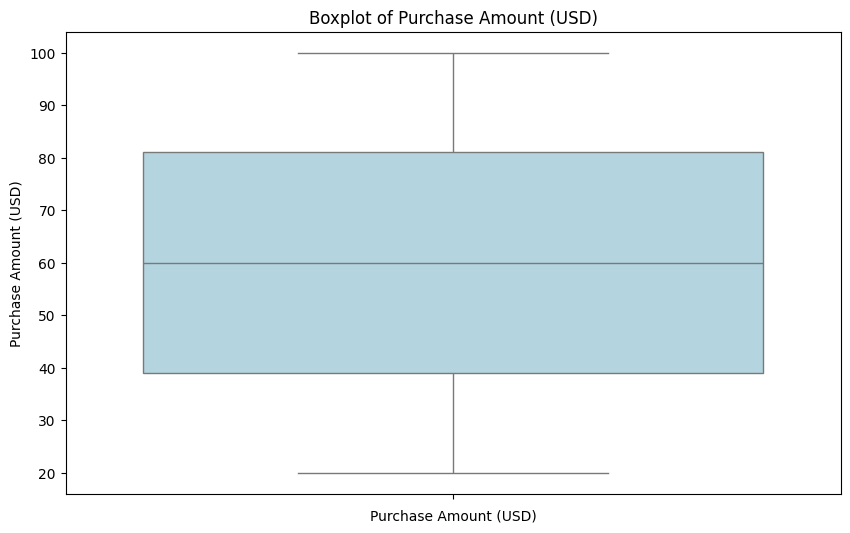

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
data = pd.read_csv('2A.tsv', sep='\t')

# Missing data handling
missing_info = data.isnull().mean() * 100  # Percentage of missing values
print(f"Missing Values Percentage:\n{missing_info}")

# Fixing 'Gender' column by replacing values
data['Gender'] = data['Gender'].replace({'M': 'Male', 'f': 'Female'})

# Convert 'Birth Date' column to datetime format, coerce errors to NaT
data['Birth Date'] = pd.to_datetime(data['Birth Date'], errors='coerce')

# Descriptive statistics (includes non-numeric columns as well)
print(f"\nDescriptive Statistics:\n{data.describe(include='all')}")

# Visualize the distribution of 'Purchase Amount (USD)' with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Purchase Amount (USD)'], color='lightblue')
plt.title('Boxplot of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.show()

# Training K-Means Clustering Model and Fine-Tuning

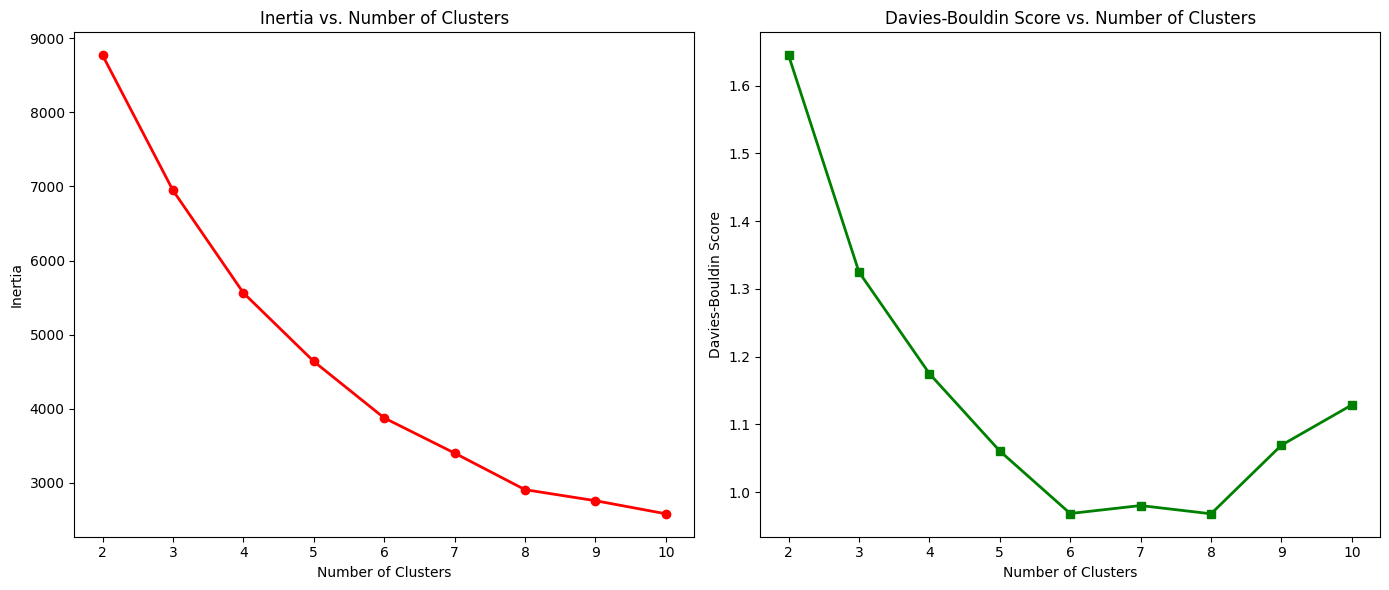

Optimal number of clusters based on silhouette score: 6


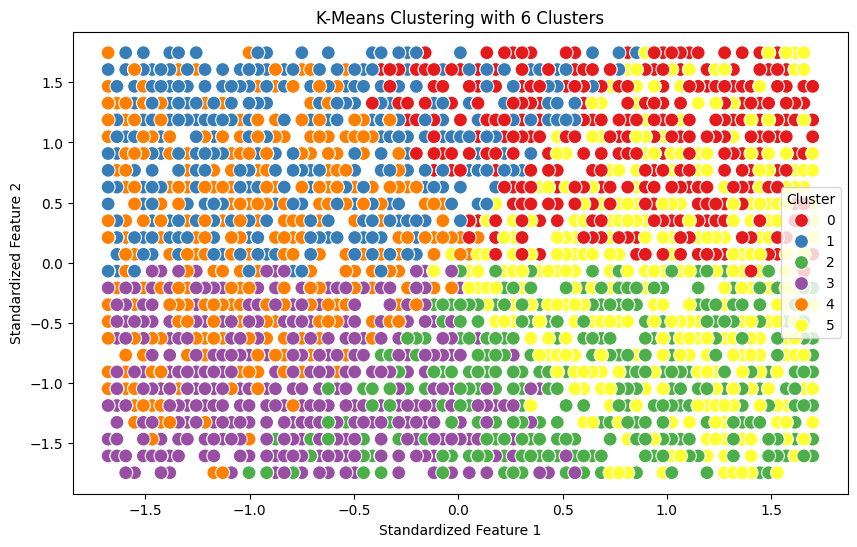

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting numerical features
features = ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Fine-tuning K-Means clustering with different k values using Inertia and Davies-Bouldin Score
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
k_range = range(2, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)

    # Append inertia and silhouette scores
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, model.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, model.labels_))

# Plotting Inertia and Davies-Bouldin scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Inertia Plot
axes[0].plot(k_range, inertia, marker='o', color='red', linestyle='-', linewidth=2)
axes[0].set_title('Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')

# Davies-Bouldin Score Plot
axes[1].plot(k_range, davies_bouldin_scores, marker='s', color='green', linestyle='-', linewidth=2)
axes[1].set_title('Davies-Bouldin Score vs. Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

# Select the best number of clusters based on silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Train K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clustering results in a 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend(title='Cluster')
plt.show()

# Analyzing Characteristics of Each Cluster


Cluster Characteristics (Mean of Features):
         Purchase Amount (USD)  Review Rating  Previous Purchases
Cluster                                                          
0                    79.015385       4.442308           36.229231
1                    42.781350       4.400482           13.173633
2                    74.565074       3.061614           37.202636
3                    41.804805       3.030180           16.656156
4                    36.067176       3.876794           39.080916
5                    83.405714       3.692000           11.221429

Customer Distribution Across Clusters:
Cluster
0    650
1    622
2    607
3    666
4    655
5    700
Name: count, dtype: int64


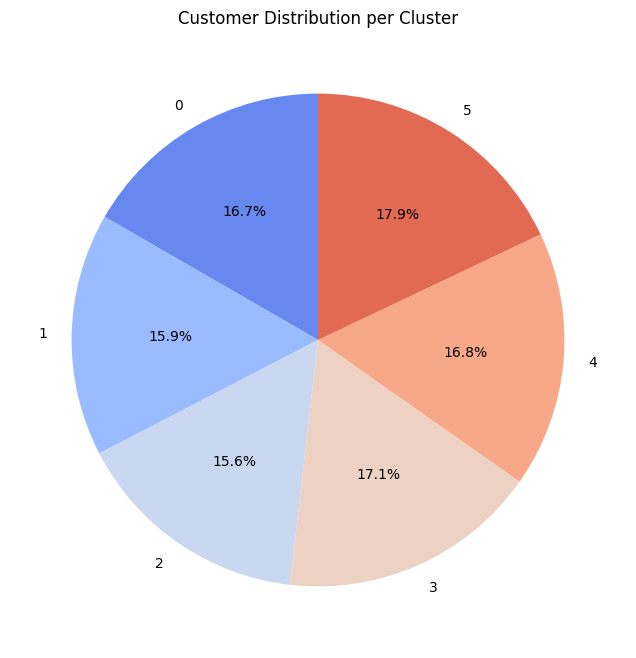

In [3]:
# Analyzing the average values for each cluster
cluster_means = data.groupby('Cluster')[features].mean()
print(f"\nCluster Characteristics (Mean of Features):\n{cluster_means}")

# Count customers per cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()
print(f"\nCustomer Distribution Across Clusters:\n{cluster_sizes}")

# Visualizing customer distribution per cluster using a pie chart
plt.figure(figsize=(8, 8))
cluster_sizes.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(cluster_sizes)), startangle=90)
plt.title('Customer Distribution per Cluster')
plt.ylabel('')  # Hide the ylabel for aesthetics
plt.show()